In [41]:
import pandas as pd
import matplotlib
from scipy.stats import pearsonr
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import os
import wrangle
import datetime as dt

In [42]:
df = wrangle.wrangle_data()
df.month = pd.to_datetime(df.month)
#drop 2022/03 due to missing data
df = df[df.month != '2022/03']
df.info()# check the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19214 entries, 0 to 19447
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   age_group   19214 non-null  object        
 1   gender      19214 non-null  object        
 2   month       19214 non-null  datetime64[ns]
 3   cause       19214 non-null  object        
 4   cause_code  19214 non-null  object        
 5   deaths      19214 non-null  int64         
 6   year        19214 non-null  object        
 7   population  19214 non-null  int64         
 8   crude_rate  19214 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [43]:
df.head()

,age_group,gender,month,cause,cause_code,deaths,year,population,crude_rate
0,01,Female,2020-01-01,#Influenza and pneumonia (J09-J18),GR113-076,12,2020,1826869,0.000007
1,01,Female,2020-01-01,#Certain conditions originating in the perinat...,GR113-108,424,2020,1826869,0.000232
2,01,Female,2020-01-01,"#Congenital malformations, deformations and ch...",GR113-109,174,2020,1826869,0.000095
3,01,Female,2020-01-01,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,36,2020,1826869,0.000020
4,01,Female,2020-01-01,"#Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)",GR113-127,14,2020,1826869,0.000008


In [44]:
covid = df[df['cause'].str.contains('#COVID-19')]
covid.head(1)

,age_group,gender,month,cause,cause_code,deaths,year,population,crude_rate
346,15-24,Female,2020-04-01,#COVID-19 (U07.1),GR113-137,26,2020,20828241,0.000001


In [45]:
# create a pivot table with month as row and age group as column
pivot_covid_deaths = covid.pivot_table(index='month', columns='age_group', values='deaths', aggfunc='sum')    
pivot_covid_deaths.head()

age_group,01,01-04,05-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
month,,,,,,,,,,,
2020-03-01,NaN,NaN,NaN,10.0,93.0,219.0,496.0,984.0,1528.0,1784.0,1629.0
2020-04-01,NaN,NaN,NaN,73.0,398.0,1050.0,3043.0,7545.0,13144.0,16786.0,19775.0
2020-05-01,NaN,NaN,NaN,43.0,207.0,544.0,1591.0,4072.0,7252.0,9008.0,12456.0
2020-06-01,NaN,NaN,NaN,35.0,159.0,384.0,1040.0,2154.0,3385.0,3948.0,4653.0
2020-07-01,NaN,NaN,NaN,86.0,311.0,805.0,1852.0,4124.0,6548.0,7313.0,7122.0


In [46]:
# create a pivot table with month as row and age group as column
pivot_covid_rate = covid.pivot_table(index='month', columns='age_group', values='crude_rate', aggfunc='sum')

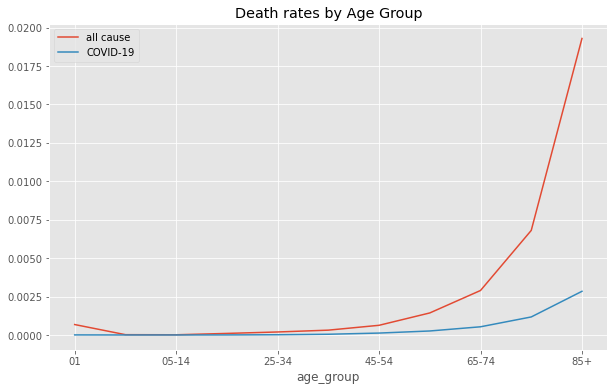

In [47]:
#create a pivot table with month as row and age group as column
pivot_all_cause_rate = df.pivot_table(index='month', columns='age_group', values='crude_rate', aggfunc='sum')
# #limit the pivot table to only the age groups over 15
# pivot_all_cause_rate = pivot_all_cause_rate[over_15]
# plot the pivot table
plt.figure(figsize=(10,6))
pivot_all_cause_rate.mean().plot(label='all cause')
pivot_covid_rate.mean().plot(label='COVID-19')
plt.legend()
plt.title('Death rates by Age Group')
plt.show()

Text(0.5, 1.0, 'Deaths by Age Group')

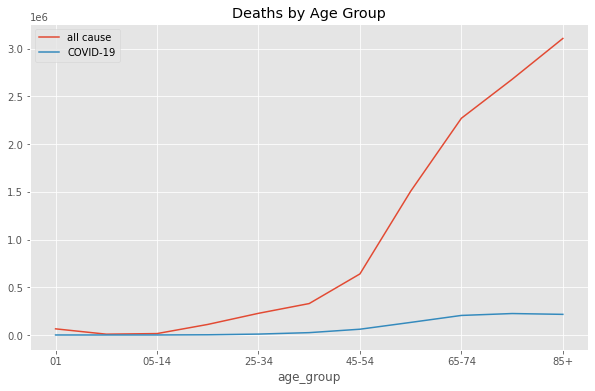

In [48]:
#create a pivot table with month as row and age group as column
pivot_all_cause_deaths = df.pivot_table(index='month', columns='age_group', values='deaths', aggfunc='sum')
# #limit the pivot table to only the age groups over 15
# pivot_all_cause_deaths = pivot_all_cause_deaths[over_15]
# plot the pivot table
plt.figure(figsize=(10,6))
pivot_all_cause_deaths.sum().plot(label='all cause')
pivot_covid_deaths.sum().plot(label='COVID-19')
plt.legend()
plt.title('Deaths by Age Group')

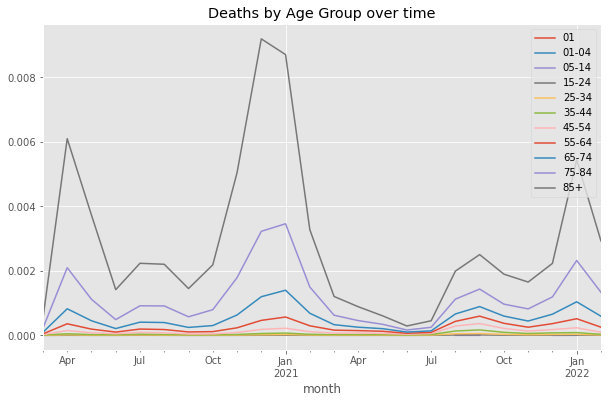

In [49]:
pivot_covid_rate.plot(figsize=(10,6))
# move legend to the top right
plt.legend(loc='upper right')
plt.title('Deaths by Age Group over time')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '#Diseases of heart (I00-I09,I11,I13,I20-I51)'),
  Text(1, 0, '#Malignant neoplasms (C00-C97)'),
  Text(2, 0, '#COVID-19 (U07.1)'),
  Text(3, 0, '#Accidents (unintentional injuries) (V01-X59,Y85-Y86)'),
  Text(4, 0, '#Cerebrovascular diseases (I60-I69)')])

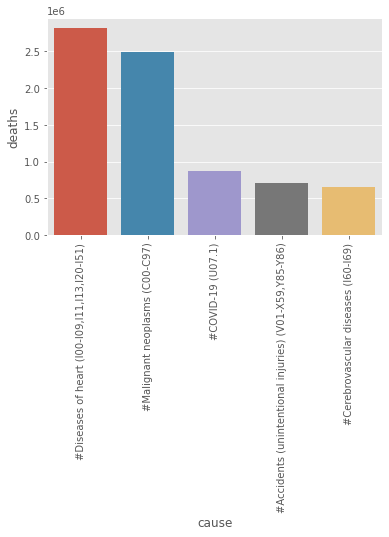

In [50]:
# top five causes of death
top_five_causes = df.groupby('cause').sum().sort_values(by='deaths', ascending=False).head(5)
top_five_causes.head()
sns.barplot(x=top_five_causes.index, y=top_five_causes['deaths'])
#rotate x labels
plt.xticks(rotation=90)

<AxesSubplot:xlabel='cause'>

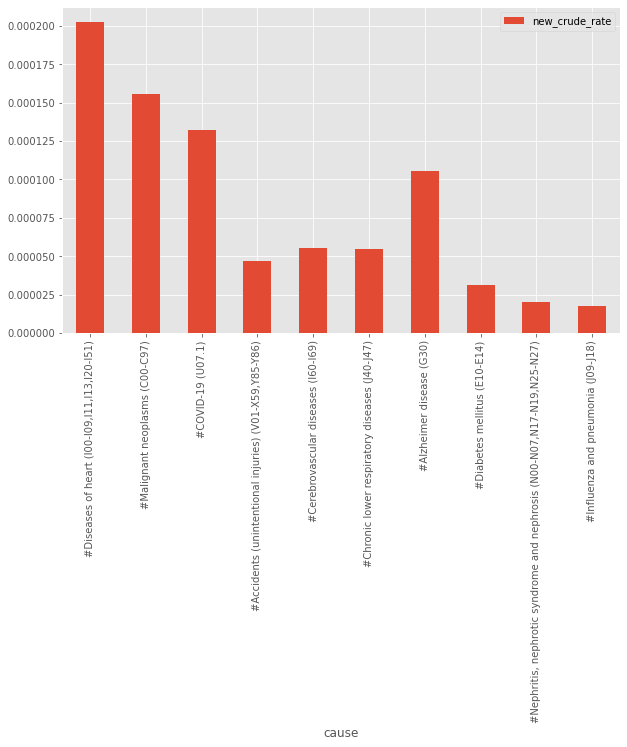

In [51]:
# top ten causes of death
top_ten_causes = df.groupby('cause').sum().sort_values(by='deaths', ascending=False).head(10)   
top_ten_causes['new_crude_rate'] = top_ten_causes.deaths/top_ten_causes.population
top_ten_causes.plot(y= 'new_crude_rate',kind='bar', figsize=(10,6))

# covid vs time

In [52]:
pivot_covid_deaths.head()

age_group,01,01-04,05-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
month,,,,,,,,,,,
2020-03-01,NaN,NaN,NaN,10.0,93.0,219.0,496.0,984.0,1528.0,1784.0,1629.0
2020-04-01,NaN,NaN,NaN,73.0,398.0,1050.0,3043.0,7545.0,13144.0,16786.0,19775.0
2020-05-01,NaN,NaN,NaN,43.0,207.0,544.0,1591.0,4072.0,7252.0,9008.0,12456.0
2020-06-01,NaN,NaN,NaN,35.0,159.0,384.0,1040.0,2154.0,3385.0,3948.0,4653.0
2020-07-01,NaN,NaN,NaN,86.0,311.0,805.0,1852.0,4124.0,6548.0,7313.0,7122.0


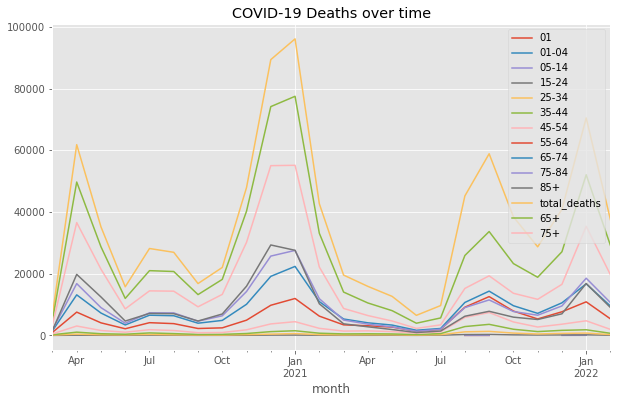

In [53]:
# add total deaths to pivot table
pivot_covid_deaths['total_deaths'] = pivot_covid_deaths.sum(axis=1)
# add 65+ age group to pivot table
pivot_covid_deaths['65+'] = pivot_covid_deaths['75-84'] + pivot_covid_deaths['65-74'] + pivot_covid_deaths['85+']
# add 65+ age group to pivot table
pivot_covid_deaths['75+'] = pivot_covid_deaths['75-84'] + pivot_covid_deaths['85+']
# plot the pivot table
pivot_covid_deaths.plot(figsize=(10,6))
# move legend to the top right
plt.legend(loc='upper right')
plt.title('COVID-19 Deaths over time')
plt.show()

 correlation between age group and covid

In [54]:
# Pull in covid death data from CDC with all ages by year grouped by month 
covid_all_ages = wrangle.prep_covid()
covid_all_ages.month = pd.to_datetime(covid_all_ages.month)

Text(0.5, 1.0, 'Deaths by Age Group til Mar 2022')

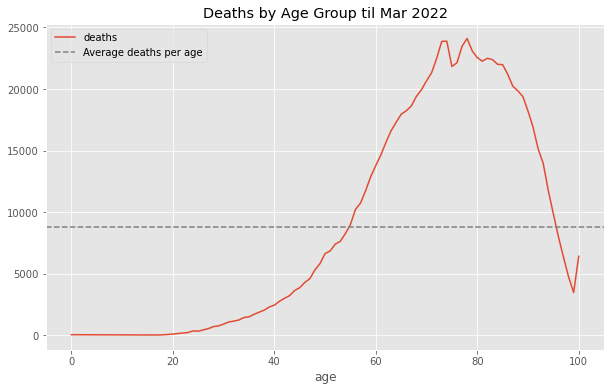

In [56]:
#groupby age and graph age vs death rate
covid_all_ages.groupby('age').sum()['deaths'].plot(figsize=(10,6))
#spike at 100 is due to 100+ age group is compressed into 1 data point
total_deaths = covid_all_ages.groupby('age').sum()['deaths'].sum()
avg_deaths_by_age = total_deaths/100
# add line to graph
plt.axhline(y=avg_deaths_by_age, color='grey', linestyle='--', label='Average deaths per age')
plt.legend()
plt.title('Deaths by Age Group til Mar 2022')



    Lets test this hypothesis

$H_0$ : There is no linear relationship between covid deaths and the age.
 
$H_A$ : There is a linear relationship between covid deaths and the age.

In [57]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing two continuous variables, 
# we can use the pearson R test

# use pearsonr to find the correlation between the covid deaths and age
corr, p = pearsonr(covid_all_ages['age'], covid_all_ages['deaths'])
print(f'The correlation between age and deaths is {corr} with a p-value of {p}')
print('We can reject the null hypothesis due to the extremely low p-value')


The correlation between age and deaths is 0.3883672296092304 with a p-value of 1.9873347902245635e-130
We can reject the null hypothesis due to the extremely low p-value


~~$H_0$ : There is no linear relationship between covid deaths and the age.~~
 
$H_A$ : There is a linear relationship between covid deaths and the age.

    Age is strongly correlated with covid deaths

## correlation between gender and covid 
  


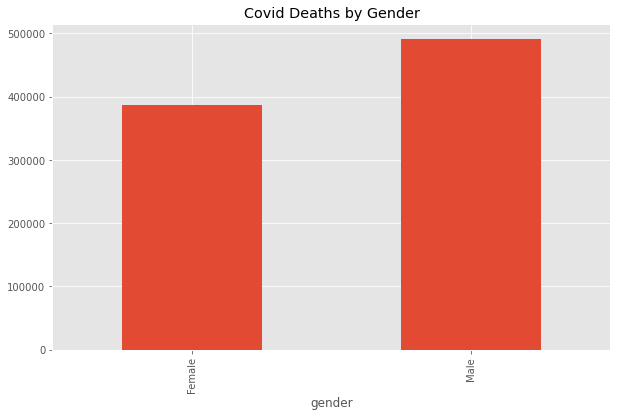

In [79]:
# plot the covid deaths vs gender
covid_all_ages.groupby('gender').sum()['deaths'].plot(figsize=(10,6), kind='bar', title= "Covid Deaths by Gender")
plt.show()


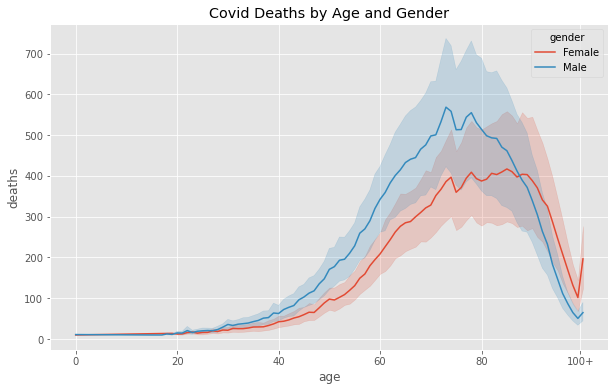

In [59]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=covid_all_ages, x= 'age', y= 'deaths', hue= 'gender')
plt.title("Covid Deaths by Age and Gender")
# set xticklabels
ax.set_xticks([0,20,40,60,80,99.5])
ax.set_xticklabels(['0','20','40','60','80','100+'])
plt.show()

    Lets test this hypothesis

$H_0$ : There is no correlation between covid deaths and the gender.
 
$H_A$ : There is  correlation between covid deaths and the gender.

In [60]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing one continuous variable to a categorical variable,
# we can use the ttest

# use a ttest to find the correlation between the covid deaths and gender
male = covid_all_ages[covid_all_ages.gender == 'Male']
female = covid_all_ages[covid_all_ages.gender == 'Female']
test_stats = stats.ttest_ind(male.deaths, female.deaths)
print(f'The correlation between gender and deaths is {test_stats[0]} with a p-value of {test_stats[1]}')
print('We can reject the null hypothesis due to the extremely low p-value')

The correlation between gender and deaths is 4.97211327792386 with a p-value of 6.930770048769238e-07
We can reject the null hypothesis due to the extremely low p-value


    Lets test this hypothesis

~~$H_0$ : There is no correlation between covid deaths and the gender.~~
 
$H_A$ : There is  correlation between covid deaths and the gender.

There is a correlation between gender and covid deaths

# avg age of covid death = 73 years old

In [61]:
covid_all_ages['deaths_times_age'] = covid_all_ages['deaths'] * covid_all_ages['age']
#divide the sums by the number of deaths to get the average age for each death
average_age = covid_all_ages['deaths_times_age'].sum() / covid_all_ages['deaths'].sum()
average_age

73.33395214544973

<AxesSubplot:title={'center':'Monthly Average Age of Death from COVID-19'}, xlabel='month'>

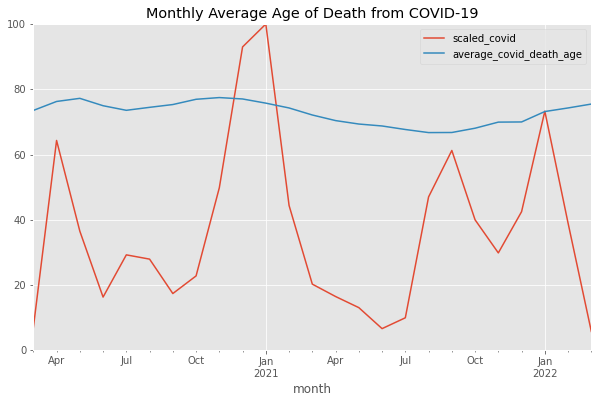

In [62]:
# make a new df with monthly average death age
monthly_deaths = pd.DataFrame()
monthly_deaths['average_covid_death_age'] = covid_all_ages.groupby('month').sum()['deaths_times_age']/covid_all_ages.groupby('month').sum()['deaths']
monthly_deaths['covid_deaths'] = covid_all_ages.groupby('month').sum()['deaths']
monthly_deaths['scaled_covid'] = monthly_deaths['covid_deaths']*100/monthly_deaths['covid_deaths'].max()
monthly_deaths[['scaled_covid','average_covid_death_age']].plot(figsize=(10,6), ylim=(0,100), title='Monthly Average Age of Death from COVID-19')



<AxesSubplot:title={'center':'Monthly Average Age of Death since covid'}, xlabel='month'>

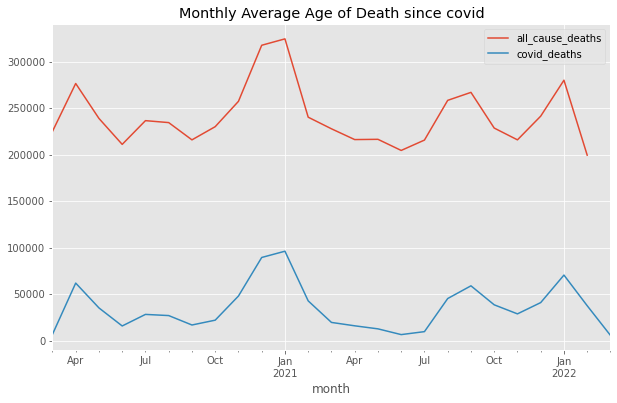

In [63]:
monthly_deaths["all_cause_deaths"] = df.groupby('month').sum()['deaths']
monthly_deaths["scaled_all_cause"] = monthly_deaths['all_cause_deaths']*100/monthly_deaths['all_cause_deaths'].max()
monthly_deaths[["all_cause_deaths", "covid_deaths"]].plot(figsize=(10,6), title='Monthly Average Age of Death since covid')
# move legend to the bottom left
#plt.legend(loc='lower left')




<AxesSubplot:title={'center':'Monthly Average Age of Death from All Causes 2018-Feb 2022'}, xlabel='month'>

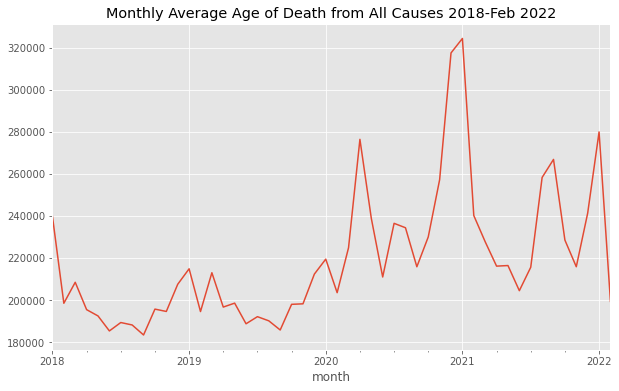

In [64]:

# graph the monthly average age of death from all causes
df.groupby('month').sum()['deaths'].plot(figsize=(10,6), title='Monthly Average Age of Death from All Causes 2018-Feb 2022')


In [65]:
deaths_by_age = wrangle.prep_age_deaths()
deaths_by_age['deaths_times_age'] = deaths_by_age['deaths'] * deaths_by_age['age']
deaths_by_age.month = pd.to_datetime(deaths_by_age.month)
#deaths_by_age.groupby('month').sum()['deaths_times_age']/deaths_by_age.groupby('month').sum()['deaths']


<AxesSubplot:title={'center':'Monthly Average Age of Death from COVID-19 vs All Causes'}, xlabel='month'>

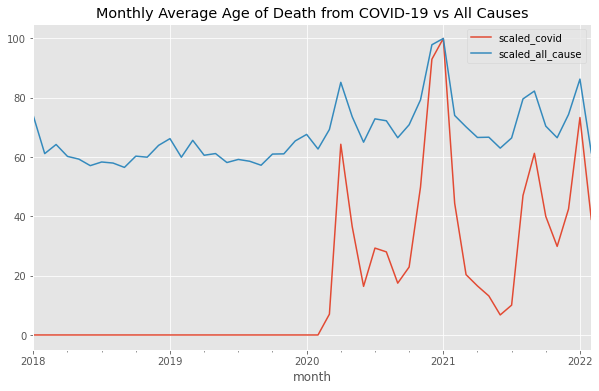

In [66]:
df2 = pd.DataFrame()
df2['all_cause_deaths'] = df.groupby('month').sum()['deaths']
df2['covid_deaths'] = df[df.cause.str.contains('COVID-19')].groupby('month').sum()['deaths']
df2['scaled_covid'] = df2['covid_deaths']*100/df2['covid_deaths'].max()
df2['scaled_all_cause'] = df2['all_cause_deaths']*100/df2['all_cause_deaths'].max()
df2['difference'] = df2['scaled_covid'] - df2['scaled_all_cause']
df2['average_death_age'] = deaths_by_age.groupby('month').sum()['deaths_times_age']/deaths_by_age.groupby('month').sum()['deaths']
df2['average_covid_death_age'] = monthly_deaths['average_covid_death_age']
df2.fillna(0, inplace=True) # fills all the prepandemic covid data with zeros
df2[['scaled_covid','scaled_all_cause']].plot(figsize=(10,6), title='Monthly scaled deaths from COVID-19 vs All Causes')


<AxesSubplot:title={'center':'Monthly Average Age of Death from COVID-19 vs All Causes'}, xlabel='month'>

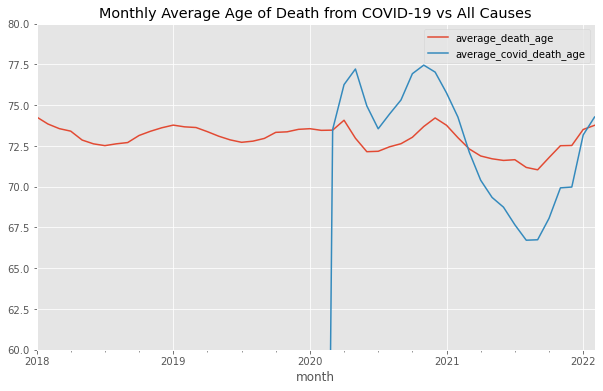

In [67]:
df2[['average_death_age', 'average_covid_death_age']].plot(figsize=(10,6), ylim=(60,80), title='Monthly Average Age of Death from COVID-19 vs All Causes')


In [68]:
df2["heart_related_deaths"] = df[df.cause.str.contains('heart')].groupby('month').sum()['deaths']
df2["scaled_heart_deaths"] = df2['heart_related_deaths']*100/df2['heart_related_deaths'].max()
df2["homicide_deaths"] = df[df.cause.str.contains('homicide')].groupby('month').sum()['deaths']
df2["scaled_homicide_deaths"] = df2['homicide_deaths']*100/df2['homicide_deaths'].max()
df2["suicide_deaths"] = df[df.cause.str.contains('suicide')].groupby('month').sum()['deaths']
df2["scaled_suicide_deaths"] = df2['suicide_deaths']*100/df2['suicide_deaths'].max()
df2["diabetes_deaths"] = df[df.cause.str.contains('Diabetes')].groupby('month').sum()['deaths']
df2["scaled_diabetes_deaths"] = df2['diabetes_deaths']*100/df2['diabetes_deaths'].max()
df2["accident_deaths"] = df[df.cause.str.contains('Accident')].groupby('month').sum()['deaths']
df2["scaled_accident_deaths"] = df2['accident_deaths']*100/df2['accident_deaths'].max()
# list of columns where name contains 'scaled'
scaled_cols = [col for col in df2.columns if 'scaled' in col]
# list cols where deaths in name bad scaled is not
deaths_cols = [col for col in df2.columns if ('deaths' in col) and ('scaled' not in col)]
deaths_cols




['all_cause_deaths',
 'covid_deaths',
 'heart_related_deaths',
 'homicide_deaths',
 'suicide_deaths',
 'diabetes_deaths',
 'accident_deaths']

<AxesSubplot:title={'center':'Monthly Deaths from COVID-19 vs All Causes'}, xlabel='month'>

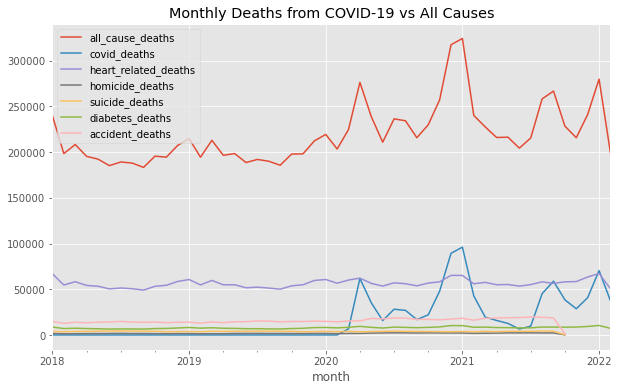

In [69]:
#plot df2
df2[deaths_cols].plot(figsize=(10,6), title='Monthly Deaths from COVID-19 vs other Causes')
# some drop off of data in late 2021

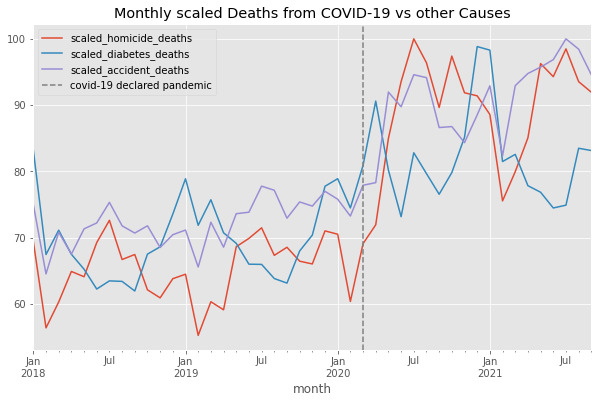

In [71]:
df2[["scaled_homicide_deaths", "scaled_diabetes_deaths","scaled_accident_deaths"]][df2.index < '2021/10'].plot(figsize=(10,6), title='Monthly scaled Deaths from COVID-19 vs other Causes')
# some drop off of data in late 2021
#add vertical line to show 2020/03
plt.axvline(x='2020/03', color='grey', linestyle='--', label='covid-19 declared pandemic')
plt.legend()
plt.show()


In [72]:
#What is first month with more than 1 death recorded from COVID-19?
df2[df2['covid_deaths'] > 1].index.min()
# note this corresponds with the declaration of pandemc by WHO,
#"WHO Director-General's opening remarks at the media briefing 
# on COVID-19 – 11 March 2020". World Health Organization (WHO) 
# (Press release). 11 March 2020. 
 

Timestamp('2020-03-01 00:00:00')

In [73]:
# make a male death df
df_male = df[df.gender=="Male"].copy()
# assign month to datetime
df_male.month = pd.to_datetime(df_male.month)
df_female = df[df.gender=="Female"].copy()
df_female.month = pd.to_datetime(df_female.month)


In [74]:
#add male deaths
df2['male_covid_deaths'] = df_male[df_male.cause.str.contains('COVID-19')].groupby('month').sum()['deaths']
df2['male_scaled_covid'] = df2['covid_deaths']*100/df2['covid_deaths'].max()
df2['male_covid_deaths'].fillna(0, inplace=True) # fills all the prepandemic covid data with zeros
df2["male_heart_related_deaths"] = df_male[df_male.cause.str.contains('heart')].groupby('month').sum()['deaths']
df2["male_scaled_heart_deaths"] = df2['male_heart_related_deaths']*100/df2['male_heart_related_deaths'].max()
df2["male_homicide_deaths"] = df_male[df_male.cause.str.contains('homicide')].groupby('month').sum()['deaths']
df2["male_scaled_homicide_deaths"] = df2['male_homicide_deaths']*100/df2['male_homicide_deaths'].max()
df2["male_suicide_deaths"] = df_male[df_male.cause.str.contains('suicide')].groupby('month').sum()['deaths']
df2["male_scaled_suicide_deaths"] = df2['male_suicide_deaths']*100/df2['male_suicide_deaths'].max()
df2["male_diabetes_deaths"] = df_male[df_male.cause.str.contains('Diabetes')].groupby('month').sum()['deaths']
df2["male_scaled_diabetes_deaths"] = df2['male_diabetes_deaths']*100/df2['male_diabetes_deaths'].max()
df2["male_accident_deaths"] = df_male[df_male.cause.str.contains('Accident')].groupby('month').sum()['deaths']
df2["male_scaled_accident_deaths"] = df2['male_accident_deaths']*100/df2['male_accident_deaths'].max()
# list of columns where name contains 'scaled'
male_scaled_cols = [col for col in df2.columns if ('male' in col) and ('scaled' in col)]
# list cols where deaths in name bad scaled is not
male_deaths_cols = [col for col in df2.columns if ('male' in col) and ('deaths' in col) and ('scaled' not in col)]



In [75]:
#add female deaths
df2['female_covid_deaths'] = df_female[df_female.cause.str.contains('COVID-19')].groupby('month').sum()['deaths']
df2['female_scaled_covid'] = df2['covid_deaths']*100/df2['covid_deaths'].max()
df2['female_covid_deaths'].fillna(0, inplace=True) # fills all the prepandemic covid data with zeros
df2["female_heart_related_deaths"] = df_female[df_female.cause.str.contains('heart')].groupby('month').sum()['deaths']
df2["female_scaled_heart_deaths"] = df2['female_heart_related_deaths']*100/df2['female_heart_related_deaths'].max()
df2["female_homicide_deaths"] = df_female[df_female.cause.str.contains('homicide')].groupby('month').sum()['deaths']
df2["female_scaled_homicide_deaths"] = df2['female_homicide_deaths']*100/df2['female_homicide_deaths'].max()
df2["female_suicide_deaths"] = df_female[df_female.cause.str.contains('suicide')].groupby('month').sum()['deaths']
df2["female_scaled_suicide_deaths"] = df2['female_suicide_deaths']*100/df2['female_suicide_deaths'].max()
df2["female_diabetes_deaths"] = df_female[df_female.cause.str.contains('Diabetes')].groupby('month').sum()['deaths']
df2["female_scaled_diabetes_deaths"] = df2['female_diabetes_deaths']*100/df2['female_diabetes_deaths'].max()
df2["female_accident_deaths"] = df_female[df_female.cause.str.contains('Accident')].groupby('month').sum()['deaths']
df2["female_scaled_accident_deaths"] = df2['female_accident_deaths']*100/df2['female_accident_deaths'].max()
# list of columns where name contains 'scaled'
female_scaled_cols = [col for col in df2.columns if ('female' in col) and ('scaled' in col)]
# list cols where deaths in name bad scaled is not
female_deaths_cols = [col for col in df2.columns if ('female' in col) and ('deaths' in col) and ('scaled' not in col)]

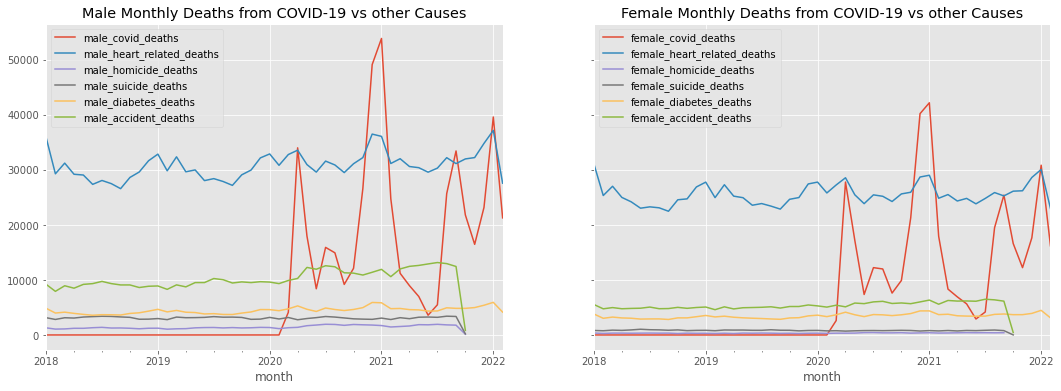

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

df2[male_deaths_cols].plot(figsize=(18,6),ax=ax1, title='Male Monthly Deaths from COVID-19 vs other Causes')
df2[female_deaths_cols].plot(ax=ax2, title='Female Monthly Deaths from COVID-19 vs other Causes')
plt.show()


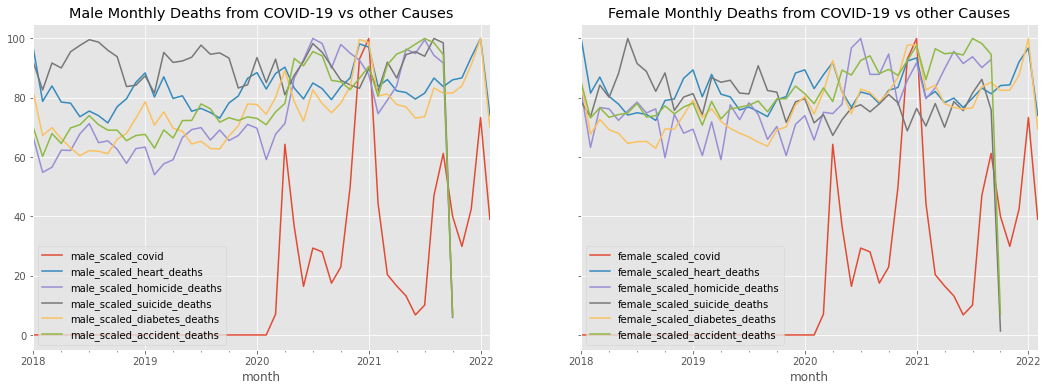

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df2[male_scaled_cols].plot(figsize=(18,6),ax=ax1, title='Male Monthly Deaths from COVID-19 vs other Causes')
ax1.legend(loc='lower left')
df2[female_scaled_cols].plot(ax=ax2, title='Female Monthly Deaths from COVID-19 vs other Causes')
ax2.legend(loc='lower left')

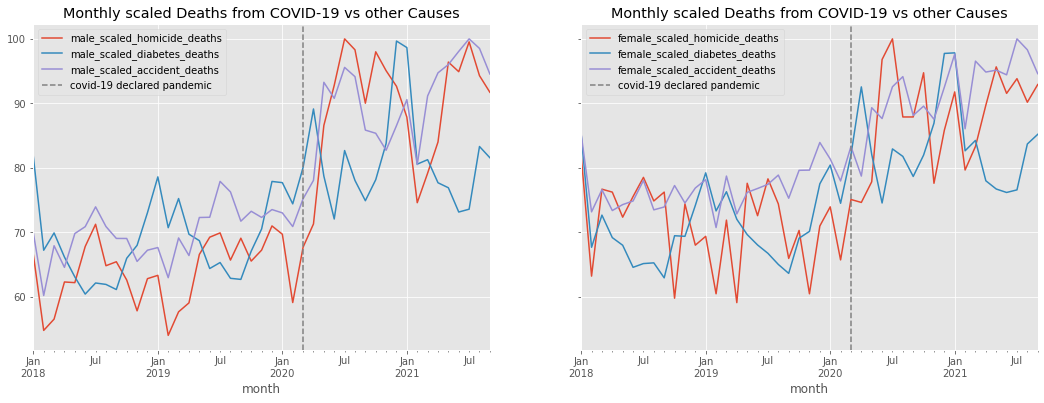

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
df2[["male_scaled_homicide_deaths", "male_scaled_diabetes_deaths","male_scaled_accident_deaths"]][df2.index < '2021/10'].plot(ax=ax1, figsize=(18,6), title='Monthly scaled Deaths from COVID-19 vs other Causes')
ax1.axvline(x='2020/03', color='grey', linestyle='--', label='covid-19 declared pandemic')
ax1.legend()
df2[["female_scaled_homicide_deaths", "female_scaled_diabetes_deaths","female_scaled_accident_deaths"]][df2.index < '2021/10'].plot(ax=ax2, figsize=(18,6), title='Monthly scaled Deaths from COVID-19 vs other Causes')
ax2.axvline(x='2020/03', color='grey', linestyle='--', label='covid-19 declared pandemic')
ax2.legend()
